# Test RatInABox 
1. Start with default values
2. Adjust parameters for the environment
3. Adjust Agent parameters

In [3]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import pandas as pd 
import numpy as np

# Save plot in specified directory
path = "../latex/figures/"
ratinabox.stylize_plots()
ratinabox.autosave_plots = False
ratinabox.figure_directory = path 

In [4]:
# Environment parameters
squeeze_box = [[0.0,0.0], [0.0,1.2], [1.6,0.8], [1.6, 0.4]]
wall_1 = [[0.0,0.6], [0.6,0.6]]
wall_2 = [[1.2, 0.6], [1.6, 0.6]]
env_params = {"boundary":squeeze_box}

# Agent parameters
start_pos = np.array([0.5, 0.5])
ag_params = {"speed_mean": 0.2, "thigmotaxis":1.0}

(<Figure size 600x600 with 1 Axes>, <Axes: >)

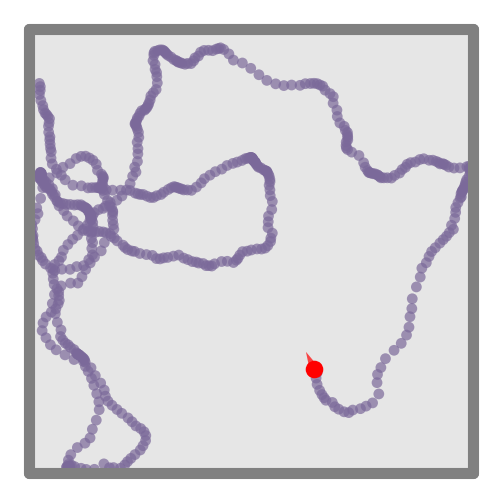

In [5]:
# Test with default parameters and a set starting position
Env = Environment()
Ag = Agent(Env)


for i in range(int(60 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()

(<Figure size 960x720 with 1 Axes>, <Axes: >)

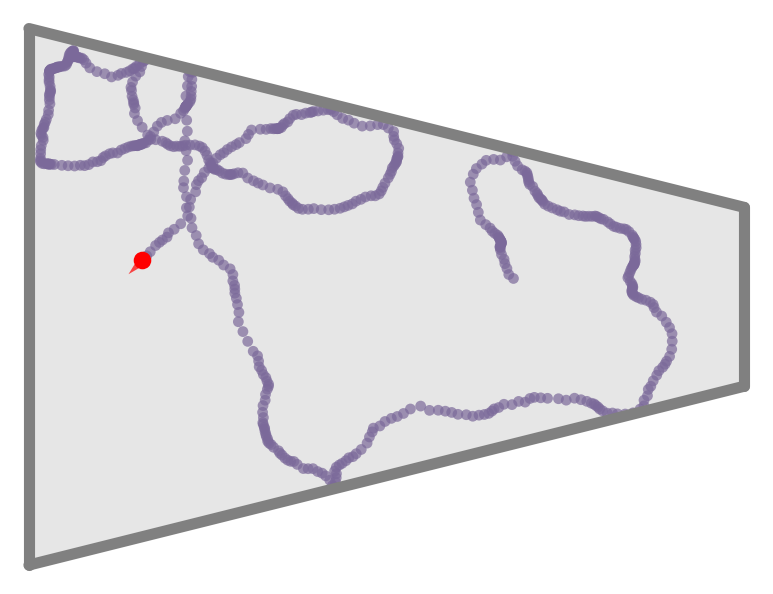

In [6]:
Env = Environment(params={"boundary":squeeze_box})
Ag = Agent(Env)

for i in range(int(60 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()

(<Figure size 960x720 with 1 Axes>, <Axes: >)

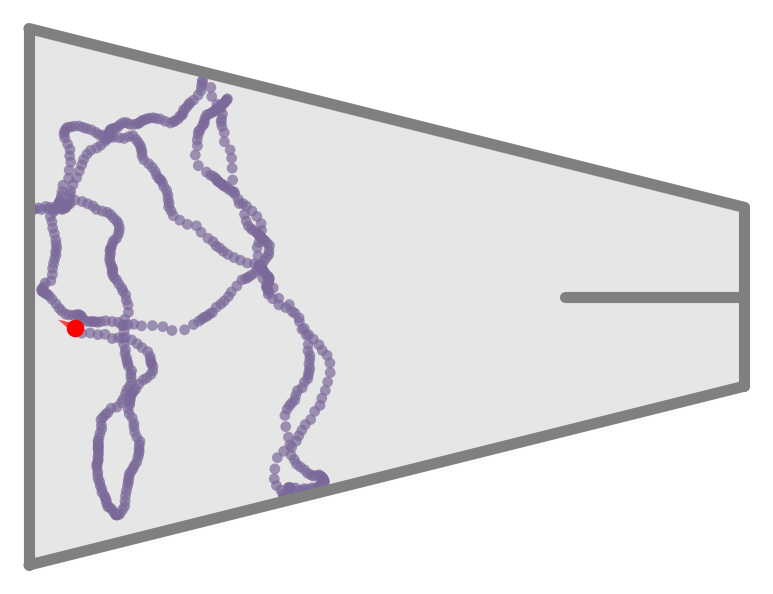

In [7]:
Env = Environment(params={"boundary":squeeze_box})
Env.add_wall(wall_2)

Ag = Agent(Env)

for i in range(int(60 / Ag.dt)):
    Ag.update()
    
Ag.plot_trajectory()

4. Make general function to generate data

In [8]:
def simulate(env_params, ag_params, write=False):
    Env = Environment(params=env_params)
    Ag = Agent(Env, params=ag_params)

    for i in range(int(60 / Ag.dt)):
        Ag.update()
    
    Ag.plot_trajectory()

    data = pd.DataFrame(Ag.history)

    if write is True:
        data.to_csv("../data/out.csv")

Possible function